## Lead Scoring - Case Study

#### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Reading theData

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

C:\Users\DELL INS 5558\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Reading the data set
leads = pd.read_csv("Leads.csv")

In [3]:
# checking for the datas
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# checking for the infos about the data set
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# shape of the dataset
leads.shape

(9240, 37)

In [6]:
# checking for missing value percentage
round((leads.isnull().sum()/len(leads)*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [7]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

In [8]:
# replacing the select values in the dataframe as null values
leads = leads.replace(['Select'],np.NaN)

In [9]:
# checking for the missing value percentage after converting Select to a null value
round((leads.isnull().sum()/len(leads)*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# dropping all the sales generated columns as they are not necessary for the model and with high missing value
lead_df = leads.drop(['Prospect ID','Lead Profile','How did you hear about X Education','Last Activity','Lead Quality','Tags','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','City','Last Notable Activity'],axis = 1)

In [11]:
# checking for the uniqueness of the variables
lead_df.nunique()

Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [12]:
# dropping the columns with only one category variable
lead_df = lead_df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis = 1)

#### Checking for the Skewness of each column

In [13]:
# Checking for the Skewness
lead_df['Country'].value_counts()/len(lead_df['Country'])*100

India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
France                   0.064935
Oman                     0.064935
unknown                  0.054113
Germany                  0.043290
Nigeria                  0.043290
Canada                   0.043290
South Africa             0.043290
Kuwait                   0.043290
Sweden                   0.032468
Ghana                    0.021645
Asia/Pacific Region      0.021645
Philippines              0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
China                    0.021645
Bangladesh               0.021645
Uganda                   0.021645
Vietnam                  0.010823
Kenya         

In [14]:
# Checking for the Skewness
lead_df['Do Not Email'].value_counts()/len(lead_df['Do Not Email'])*100

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

In [15]:
# Checking for the Skewness
lead_df['Do Not Call'].value_counts()/len(lead_df['Do Not Call'])*100

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

In [16]:
# Checking for the Skewness
lead_df['Search'].value_counts()/len(lead_df['Search'])*100

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

In [17]:
# Checking for the Skewness
lead_df['Newspaper Article'].value_counts()/len(lead_df['Newspaper Article'])*100

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

In [18]:
# Checking for the Skewness
lead_df['X Education Forums'].value_counts()/len(lead_df['X Education Forums'])*100

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

In [19]:
# Checking for the Skewness
lead_df['Newspaper'].value_counts()/len(lead_df['Newspaper'])*100

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

In [20]:
# Checking for the Skewness
lead_df['Digital Advertisement'].value_counts()/len(lead_df['Digital Advertisement'])*100

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

In [21]:
# Checking for the Skewness
lead_df['Through Recommendations'].value_counts()/len(lead_df['Through Recommendations'])*100

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

In [22]:
# Checking for the Skewness
lead_df['A free copy of Mastering The Interview'].value_counts()/len(lead_df['A free copy of Mastering The Interview'])*100

No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64

In [23]:
# Checking for the Skewness
lead_df['What matters most to you in choosing a course'].value_counts()/len(lead_df['What matters most to you in choosing a course'])*100

Better Career Prospects      70.649351
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [24]:
# dropping the columns with high skewness
lead_df = lead_df.drop(['Through Recommendations','Digital Advertisement','Newspaper','X Education Forums','Newspaper Article','Search','Do Not Call','Do Not Email'], axis = 1)

In [25]:
# checking for the missing values after dropping the unnecessary variables 
lead_df.isnull().sum()/len(lead_df)*100

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
A free copy of Mastering The Interview            0.000000
dtype: float64

In [26]:
# checking the mode of the column
lead_df['Specialization'].mode()

0    Finance Management
dtype: object

In [27]:
# imputing the missing value of the column with its mode
lead_df['Specialization'] = lead_df['Specialization'].fillna('Finance Management')

In [28]:
# imputing the missing value of the column 
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].fillna('Not Provided')

In [29]:
# checking the mode of the column
lead_df['What is your current occupation'].mode()

0    Unemployed
dtype: object

In [30]:
# imputing the missing value of the column with its mode
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].fillna('Unemployed')

In [31]:
# treating the null values of the continuous variable by its median
lead_df['TotalVisits'] = lead_df['TotalVisits'].fillna(lead_df['TotalVisits'].median())
lead_df['Page Views Per Visit'] = lead_df['Page Views Per Visit'].fillna(lead_df['Page Views Per Visit'].median())

In [32]:
# checking for the missing value percentage after data cleaning
lead_df.isnull().sum()/len(lead_df)*100

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Country                                          26.634199
Specialization                                    0.000000
What is your current occupation                   0.000000
What matters most to you in choosing a course     0.000000
A free copy of Mastering The Interview            0.000000
dtype: float64

In [33]:
# checking for the percentage of rows retained
round(100*len(lead_df)/len(leads),2)

100.0

### EDA

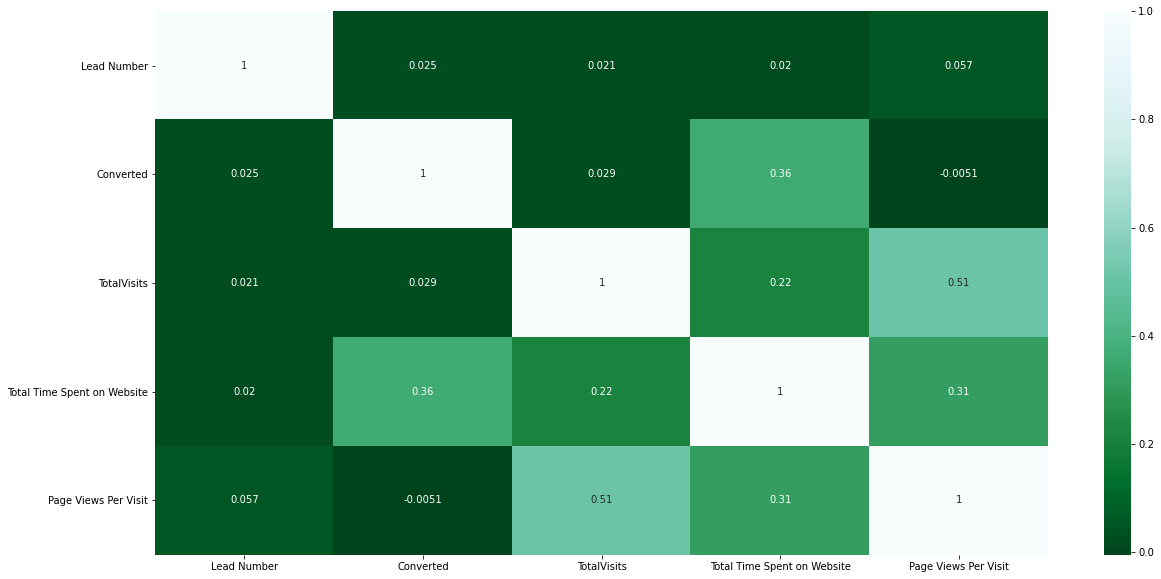

In [34]:
# checking the correlation between the variables
plt.figure(figsize=(20,10))
sns.heatmap(lead_df.corr(), cmap="BuGn_r", annot = True)
plt.show()

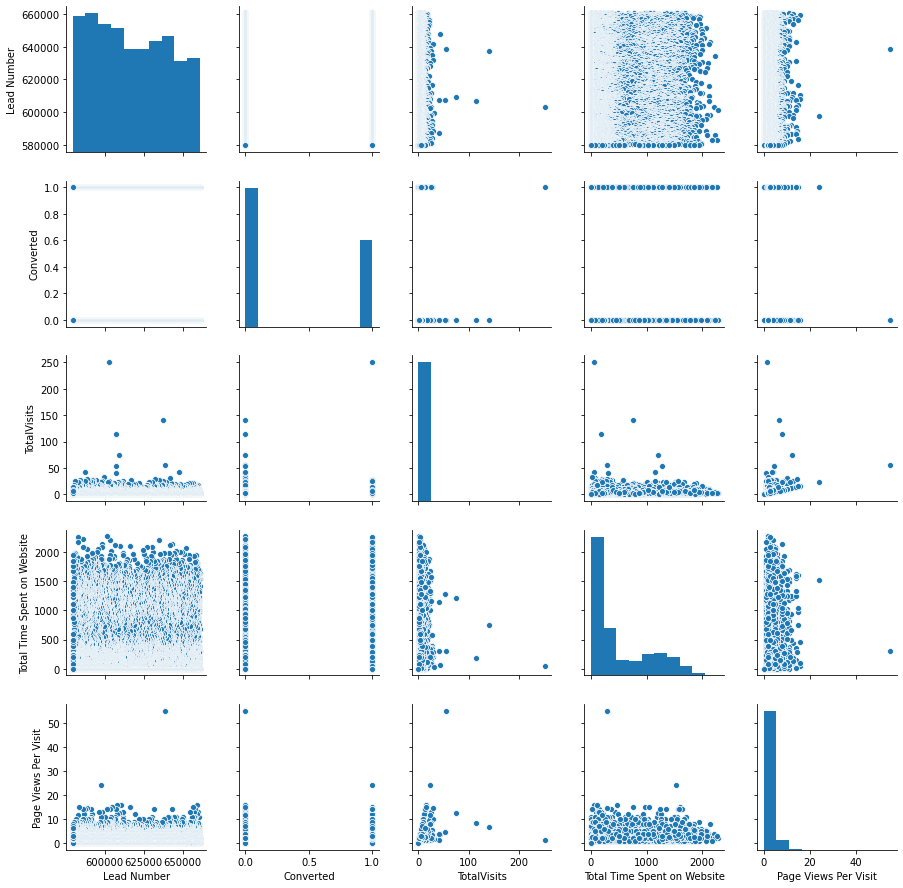

In [35]:
# preforming the EDA for the numerical variables
sns.pairplot(lead_df)
plt.show()

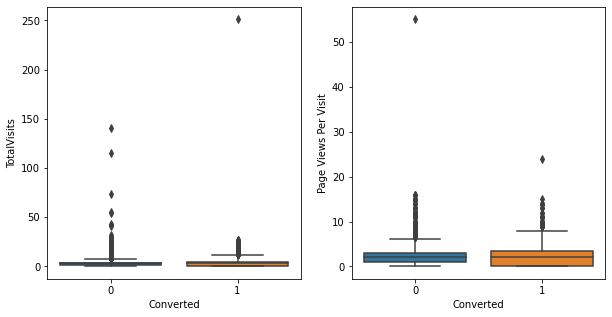

In [36]:
# Checking for the outliers in the variable
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x = 'Converted', y = 'TotalVisits', data = lead_df)
plt.subplot(1,2,2)
sns.boxplot(x = 'Converted', y = 'Page Views Per Visit', data = lead_df)
plt.show()

From the boxplot it is seen that there are few outliers present. 

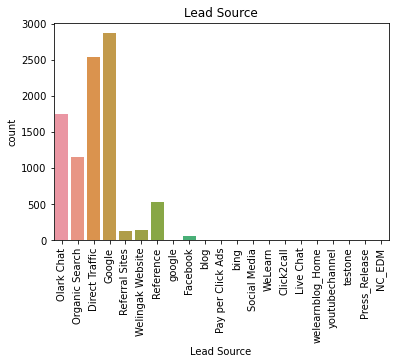

In [37]:
# analysis of the Lead Source variable
sns.countplot(lead_df['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

From the above bar graph it is seen apart from a few sources there are very negligible perrcentage available in other categories. Hence we are clubbing all the other categories into a single category called 'Social Media'

In [38]:
def mapping(x):
    category = ""
    if x == "Google":
        category = "Google"
    elif x == "Direct Traffic":
        category = "Direct Traffic"
    elif x == "Olark Chat":
        category = "Olark Chat"
    elif x == "Organic Search":
        category = "Organic Search"
    else:
        category = "Social Media"
    return category

lead_df['Lead Source'] = lead_df.apply(lambda x:mapping(x['Lead Source']), axis = 1)
lead_df['Lead Source'].value_counts()

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Social Media       920
Name: Lead Source, dtype: int64

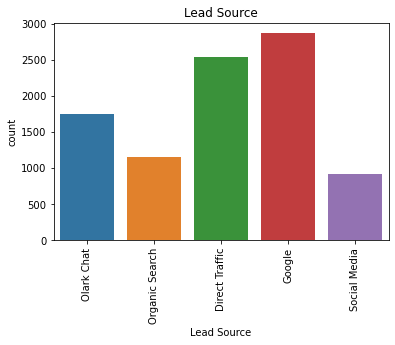

In [39]:
sns.countplot(lead_df['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

The above bar graph shows clearly that most of the leads find their source through Google anf few through the Social Medias

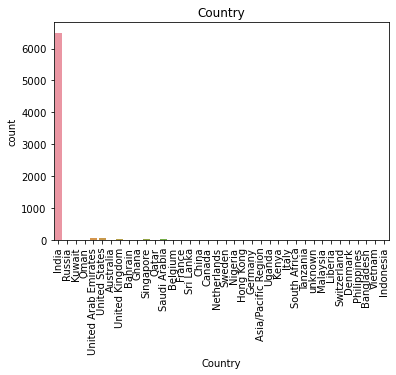

In [40]:
# analysis of the Country variable 
sns.countplot(lead_df['Country']).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

It is clearly seen that mostly 90% of the leads are from India and hence all the other countries are converted into a single category called "Other Countries"

In [41]:
lead_df['Country']=lead_df['Country'].fillna('Not mentioned')

In [42]:
def Country_map(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Not mentioned":
        category = "Not mentioned"
    else:
        category = "Other Countries"
    return category

lead_df['Country'] = lead_df.apply(lambda x:Country_map(x['Country']), axis = 1)
lead_df['Country'].value_counts()

India              6492
Not mentioned      2461
Other Countries     287
Name: Country, dtype: int64

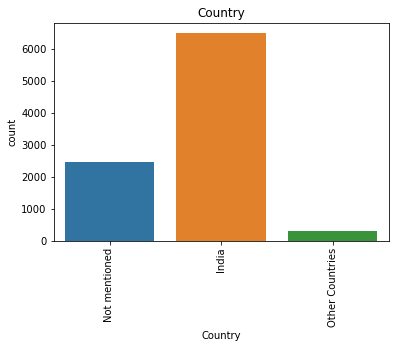

In [43]:
sns.countplot(lead_df['Country']).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

The graph shows majority of the learners are from India

In [44]:
lead_df.isnull().sum()

Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
A free copy of Mastering The Interview           0
dtype: int64

### Data Preparation

#### Dummy Variables

In [45]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9240 non-null   float64
 7   Country                                        9240 non-null   object 
 8   Specialization                                 9240 non-null   object 
 9   What is your current occupation                9240 

In [46]:
#creating dummy variables for the categorical variables in a separate variable
Lead_Origin = pd.get_dummies(lead_df['Lead Origin'],prefix='Lead Origin', drop_first = True)
Lead_Source = pd.get_dummies(lead_df['Lead Source'],prefix='Lead Source', drop_first = True)
Country = pd.get_dummies(lead_df['Country'],prefix='Country', drop_first = True)
Specialization = pd.get_dummies(lead_df['Specialization'],prefix='Specialization', drop_first = True)
current_occupation = pd.get_dummies(lead_df['What is your current occupation'],prefix='occupation',drop_first = True)
course = pd.get_dummies(lead_df['What matters most to you in choosing a course'],prefix='course',drop_first = True)
Interview = pd.get_dummies(lead_df['A free copy of Mastering The Interview'],prefix='Interview',drop_first = True)

In [47]:
# concatinating the dummy variables with the dataset
lead_df = pd.concat([lead_df, Lead_Origin, Lead_Source, Country, Specialization, current_occupation, course, Interview], axis = 1)

In [48]:
# dropping the variables of which the dummy variables were created
lead_df = lead_df.drop(['Lead Origin','Lead Source','Country','Specialization','What is your current occupation','What matters most to you in choosing a course', 'A free copy of Mastering The Interview'],axis = 1)

In [49]:
lead_df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,Specialization_Travel and Tourism,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,course_Flexibility & Convenience,course_Not Provided,course_Other,Interview_Yes
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,660719,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [50]:
# Saving the dataset into a new data frame
lead = lead_df

In [51]:
lead.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,Specialization_Travel and Tourism,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,course_Flexibility & Convenience,course_Not Provided,course_Other,Interview_Yes
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,660719,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


### Splitting the data into Test and Training Set

In [52]:
# splitting the data set into training and testing sets randomly 
from sklearn.model_selection import train_test_split
lead_train, lead_test = train_test_split(lead, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the continuous variables

In [53]:
# importing the necessary library
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [54]:
# scaling the numerical variables using Min-Max Scaler of the training data-set.

numerical_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

lead_train[numerical_vars] = scaler.fit_transform(lead_train[numerical_vars])

lead_train.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,Specialization_Travel and Tourism,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,course_Flexibility & Convenience,course_Not Provided,course_Other,Interview_Yes
1871,641410,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6795,597687,0,0.015936,0.214349,0.024182,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3516,626825,0,0.019920,0.046655,0.045455,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8105,587928,0,0.019920,0.541373,0.090909,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3934,622366,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [55]:
lead_train.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,Specialization_Travel and Tourism,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,course_Flexibility & Convenience,course_Not Provided,course_Other,Interview_Yes
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,617186.001546,0.381262,0.013815,0.212974,0.042686,0.528139,0.079468,0.005102,0.000155,0.315863,...,0.021336,0.001391,0.001237,0.021027,0.897805,0.077613,0.000309,0.294682,0.000155,0.311843
std,23372.003514,0.485734,0.021048,0.240566,0.039326,0.499246,0.270489,0.071252,0.012434,0.464894,...,0.144512,0.037279,0.035150,0.143484,0.302929,0.267582,0.017583,0.455935,0.012434,0.463282
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596516.250000,0.000000,0.003984,0.005282,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615720.500000,0.000000,0.011952,0.108275,0.036364,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637348.750000,1.000000,0.019920,0.407790,0.054545,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,660728.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y set for modelling

In [56]:
X_train = lead_train.drop(['Lead Number','Converted'],axis = 1)
y_train = lead_train['Converted']

In [57]:
y_train

1871    0
6795    0
3516    0
8105    0
3934    0
       ..
350     1
79      1
8039    1
6936    0
5640    0
Name: Converted, Length: 6468, dtype: int64

### Building Model

In [58]:
logm = sm.GLM(y_train, X_train, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6429
Model Family:                Binomial   Df Model:                           38
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2904.0
Date:                Mon, 26 Oct 2020   Deviance:                       5808.0
Time:                        22:45:03   Pearson chi2:                 7.70e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
TotalVisits                                  5.4576      2.044      2.670      0.008       1.452       9.463
Total Time Spent on Website                  4.5843      0.161     28.543      0.000       4.270       4.899
Page Views Per Visit                        -0.7532      1.135     -0.664      0.507      -2.977       1.470
Lead Origin_Landing Page Submission         -0.2463      0.111     -2.210      0.027      -0.465      -0.028
Lead Origin_Lead Add Form                    3.4828      0.393      8.864      0.000       2.713       4.253
Lead Origin_Lead Import                     -0.4565      0.635     -0.719      0.472      -1.702       0.789
Lead Origin_Quick Add Form                  19.1020   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Google                           0.3781      0.108      3.499      0.000       0.166       0.590
Lead Source_Olark Chat                       0.7789      0.249      3.122      0.002       0.290       1.268
Lead Source_Organic Search                   0.1915      0.123      1.559      0.119      -0.049       0.432
Lead Source_Social Media                    -0.0817      0.284     -0.287      0.774      -0.639       0.476
Country_Not mentioned                        0.4775      0.237      2.015      0.044       0.013       0.942
Country_Other Countries                     -0.1825      0.200     -0.915      0.360      -0.574       0.209
Specialization_Business Administration      -0.3883      0.232     -1.676      0.094      -0.843       0.066
Specialization_E-Business                   -0.3555      0.449     -0.792      0.428      -1.235       0.524
Specialization_E-COMMERCE                    0.0139      0.322      0.043      0.966      -0.617       0.645
Specialization_Finance Management           -0.6326      0.184     -3.430      0.001      -0.994      -0.271
Specialization_Healthcare Management        -0.0999      0.313     -0.319      0.750      -0.714       0.514
Specialization_Hospitality Management       -1.3143      0.356     -3.695      0.000      -2.012      -0.617
Specialization_Human Resource Management    -0.3658      0.199     -1.834      0.067      -0.757       0.025
Specialization_IT Projects Management       -0.1651      0.234     -0.704      0.481      -0.625       0.295
Specialization_International Business       -0.6511      0.301     -2.162      0.031      -1.241      -0.061
Specialization_Marketing Management         -0.3168      0.200     -1.585      0.113      -0.709       0.075
Specialization_Media and Advertising        -0.1556      0.276     -0.563      0.574      -0.697       0.386
Specialization_Operations Management        -0.2295      0.218     -1.052      0.293      -0.657       0.198
Specialization_Retail Managemen

### RFE - Recursive Feature Elimination

In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [60]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
 # running RFE
rfe = RFE(lm,20)            
rfe = rfe.fit(X_train, y_train)

In [62]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 2),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Social Media', False, 20),
 ('Country_Not mentioned', True, 1),
 ('Country_Other Countries', False, 11),
 ('Specialization_Business Administration', False, 7),
 ('Specialization_E-Business', False, 5),
 ('Specialization_E-COMMERCE', False, 15),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Healthcare Management', False, 18),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 9),
 ('Specialization_IT Projects Management', False, 13),
 ('Specialization_International Business', True, 1),
 ('Specialization_Market

In [63]:
column = X_train.columns[rfe.support_]
column

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Country_Not mentioned',
       'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness', 'occupation_Housewife',
       'occupation_Other', 'occupation_Working Professional',
       'course_Flexibility & Convenience', 'course_Not Provided',
       'course_Other'],
      dtype='object')

In [64]:
X_train.columns[~rfe.support_]

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Quick Add Form',
       'Lead Source_Social Media', 'Country_Other Countries',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'occupation_Student',
       'occupation_Unemployed', 'Interview_Yes'],
      dtype='object')

In [65]:
# Creating X_train dataframe with RFE selected variables
X_train = X_train[column]

In [66]:
# Adding a constant variable to X_train 
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)
X_train.head()

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Country_Not mentioned,...,Specialization_Hospitality Management,Specialization_International Business,Specialization_Retail Management,Specialization_Rural and Agribusiness,occupation_Housewife,occupation_Other,occupation_Working Professional,course_Flexibility & Convenience,course_Not Provided,course_Other
1871,1.0,0.000000,0.000000,0.000000,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6795,1.0,0.015936,0.214349,0.024182,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,1.0,0.019920,0.046655,0.045455,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8105,1.0,0.019920,0.541373,0.090909,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3934,1.0,0.000000,0.000000,0.000000,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [67]:
logm = sm.GLM(y_train, X_train, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2909.0
Date:                Mon, 26 Oct 2020   Deviance:                       5818.0
Time:                        22:45:05   Pearson chi2:                 7.69e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.0285      0.102    -19.859      0.000      -2.229      -1.828
TotalVisits                               5.5066      2.062      2.670      0.008       1.465       9.549
Total Time Spent on Website               4.5900      0.160     28.675      0.000       4.276       4.904
Page Views Per Visit                     -0.9703      1.132     -0.857      0.391      -3.189       1.248
Lead Origin_Lead Add Form                 3.6258      0.286     12.689      0.000       3.066       4.186
Lead Origin_Lead Import                  -0.3151      0.574     -0.549      0.583      -1.440       0.809
Lead Source_Google                        0.4780      0.085      5.625      0.000       0.311       0.645
Lead Source_Olark Chat                    0.9810      0.233      4.211      0.000       0.524       1.438
Lead Source_Organic Search                0.2858      0.113      2.527      0.012       0.064       0.508
Country_Not mentioned                     0.4740      0.233      2.031      0.042       0.017       0.931
Specialization_Finance Management        -0.2490      0.078     -3.212      0.001      -0.401      -0.097
Specialization_Hospitality Management    -1.0318      0.315     -3.280      0.001      -1.648      -0.415
Specialization_International Business    -0.3848      0.254     -1.517      0.129      -0.882       0.112
Specialization_Retail Management         -0.4834      0.317     -1.525      0.127      -1.105       0.138
Specialization_Rural and Agribusiness     0.3377      0.366      0.923      0.356      -0.379       1.055
occupation_Housewife                     22.2967   1.37e+04      0.002      0.999   -2.68e+04    2.68e+04
occupation_Other                         -0.8049      0.792     -1.017      0.309      -2.357       0.747
occupation_Working Professional           2.5454      0.182     13.986      0.000       2.189       2.902
course_Flexibility & Convenience         -2.3177      3.171     -0.731      0.465      -8.532       3.897
course_Not Provided                      -1.2670      0.082    -15.396      0.000      -1.428      -1.106
course_Other                            -21.4268   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
=========================================================================================================
"""

In [68]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = X_train.drop(['const'], axis=1)

In [69]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Country_Not mentioned,13.58
6,Lead Source_Olark Chat,9.52
3,Lead Origin_Lead Add Form,4.73
2,Page Views Per Visit,3.06
9,Specialization_Finance Management,2.45
1,Total Time Spent on Website,1.95
5,Lead Source_Google,1.90
0,TotalVisits,1.85
18,course_Not Provided,1.51
7,Lead Source_Organic Search,1.46


In [70]:
# dropping the variable with high p-value
X_train = X_train.drop(['course_Other'], axis = 1)

### Iteration 1:

In [71]:
X_train1 = sm.add_constant(X_train)

In [72]:
logm1 = sm.GLM(y_train, X_train1, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2909.3
Date:                Mon, 26 Oct 2020   Deviance:                       5818.5
Time:                        22:45:06   Pearson chi2:                 7.69e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.0304      0.102    -19.885      0.000      -2.230      -1.830
TotalVisits                               5.5129      2.063      2.672      0.008       1.469       9.557
Total Time Spent on Website               4.5907      0.160     28.678      0.000       4.277       4.904
Page Views Per Visit                     -0.9619      1.131     -0.850      0.395      -3.179       1.256
Lead Origin_Lead Add Form                 3.6271      0.286     12.694      0.000       3.067       4.187
Lead Origin_Lead Import                  -0.3142      0.574     -0.548      0.584      -1.439       0.810
Lead Source_Google                        0.4789      0.085      5.636      0.000       0.312       0.645
Lead Source_Olark Chat                    0.9821      0.233      4.216      0.000       0.526       1.439
Lead Source_Organic Search                0.2865      0.113      2.532      0.011       0.065       0.508
Country_Not mentioned                     0.4743      0.233      2.032      0.042       0.017       0.932
Specialization_Finance Management        -0.2486      0.078     -3.206      0.001      -0.401      -0.097
Specialization_Hospitality Management    -1.0315      0.315     -3.279      0.001      -1.648      -0.415
Specialization_International Business    -0.3844      0.254     -1.515      0.130      -0.882       0.113
Specialization_Retail Management         -0.4829      0.317     -1.523      0.128      -1.104       0.138
Specialization_Rural and Agribusiness     0.3383      0.366      0.924      0.355      -0.379       1.055
occupation_Housewife                     22.2973   1.37e+04      0.002      0.999   -2.68e+04    2.68e+04
occupation_Other                         -0.8045      0.792     -1.016      0.310      -2.356       0.747
occupation_Working Professional           2.5460      0.182     13.989      0.000       2.189       2.903
course_Flexibility & Convenience         -2.3178      3.172     -0.731      0.465      -8.534       3.898
course_Not Provided                      -1.2668      0.082    -15.393      0.000      -1.428      -1.105
=========================================================================================================
"""

In [73]:
X_train1 = X_train1.drop(['const'], axis=1)

In [74]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Country_Not mentioned,13.58
6,Lead Source_Olark Chat,9.52
3,Lead Origin_Lead Add Form,4.73
2,Page Views Per Visit,3.06
9,Specialization_Finance Management,2.45
1,Total Time Spent on Website,1.95
5,Lead Source_Google,1.90
0,TotalVisits,1.85
18,course_Not Provided,1.51
7,Lead Source_Organic Search,1.46


In [75]:
X_train1 = X_train1.drop(['Country_Not mentioned'], axis = 1)

### Iteration 2:

In [76]:
X_train2 = sm.add_constant(X_train1)

In [77]:
logm2 = sm.GLM(y_train, X_train2, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2911.3
Date:                Mon, 26 Oct 2020   Deviance:                       5822.6
Time:                        22:45:07   Pearson chi2:                 7.64e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.0098      0.102    -19.801      0.000      -2.209      -1.811
TotalVisits                               5.2757      2.019      2.614      0.009       1.319       9.232
Total Time Spent on Website               4.5484      0.158     28.718      0.000       4.238       4.859
Page Views Per Visit                     -1.0334      1.131     -0.913      0.361      -3.251       1.184
Lead Origin_Lead Add Form                 4.0609      0.192     21.168      0.000       3.685       4.437
Lead Origin_Lead Import                   0.1314      0.529      0.248      0.804      -0.905       1.168
Lead Source_Google                        0.4733      0.085      5.586      0.000       0.307       0.639
Lead Source_Olark Chat                    1.3857      0.124     11.137      0.000       1.142       1.630
Lead Source_Organic Search                0.2848      0.113      2.523      0.012       0.064       0.506
Specialization_Finance Management        -0.2267      0.077     -2.958      0.003      -0.377      -0.076
Specialization_Hospitality Management    -1.0197      0.314     -3.250      0.001      -1.635      -0.405
Specialization_International Business    -0.3775      0.253     -1.492      0.136      -0.873       0.119
Specialization_Retail Management         -0.4837      0.316     -1.529      0.126      -1.104       0.136
Specialization_Rural and Agribusiness     0.3479      0.365      0.953      0.340      -0.368       1.063
occupation_Housewife                     22.2758   1.36e+04      0.002      0.999   -2.67e+04    2.67e+04
occupation_Other                         -0.7948      0.790     -1.006      0.314      -2.344       0.754
occupation_Working Professional           2.5495      0.182     14.024      0.000       2.193       2.906
course_Flexibility & Convenience         -2.2792      3.188     -0.715      0.475      -8.528       3.969
course_Not Provided                      -1.2643      0.082    -15.363      0.000      -1.426      -1.103
=========================================================================================================
"""

In [78]:
X_train2 = X_train2.drop(['const'], axis=1)

In [79]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.06
8,Specialization_Finance Management,2.39
1,Total Time Spent on Website,1.93
5,Lead Source_Google,1.90
0,TotalVisits,1.85
6,Lead Source_Olark Chat,1.84
17,course_Not Provided,1.51
7,Lead Source_Organic Search,1.46
3,Lead Origin_Lead Add Form,1.22
15,occupation_Working Professional,1.18


In [80]:
X_train2 = X_train2.drop(['occupation_Housewife'], axis = 1)

### Iteration 3

In [81]:
X_train3 = sm.add_constant(X_train2)

In [82]:
logm3 = sm.GLM(y_train, X_train3, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2916.0
Date:                Mon, 26 Oct 2020   Deviance:                       5832.1
Time:                        22:45:07   Pearson chi2:                 7.66e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.0014      0.101    -19.741      0.000      -2.200      -1.803
TotalVisits                               5.2310      2.011      2.601      0.009       1.289       9.173
Total Time Spent on Website               4.5462      0.158     28.722      0.000       4.236       4.856
Page Views Per Visit                     -1.0798      1.133     -0.953      0.340      -3.300       1.140
Lead Origin_Lead Add Form                 4.0677      0.192     21.220      0.000       3.692       4.443
Lead Origin_Lead Import                   0.1296      0.529      0.245      0.806      -0.907       1.166
Lead Source_Google                        0.4759      0.085      5.623      0.000       0.310       0.642
Lead Source_Olark Chat                    1.3833      0.124     11.121      0.000       1.140       1.627
Lead Source_Organic Search                0.2916      0.113      2.586      0.010       0.071       0.513
Specialization_Finance Management        -0.2321      0.077     -3.031      0.002      -0.382      -0.082
Specialization_Hospitality Management    -1.0262      0.314     -3.270      0.001      -1.641      -0.411
Specialization_International Business    -0.3832      0.253     -1.514      0.130      -0.879       0.113
Specialization_Retail Management         -0.4889      0.316     -1.546      0.122      -1.109       0.131
Specialization_Rural and Agribusiness     0.3417      0.365      0.936      0.349      -0.374       1.057
occupation_Other                         -0.7982      0.790     -1.010      0.312      -2.347       0.750
occupation_Working Professional           2.5447      0.182     13.997      0.000       2.188       2.901
course_Flexibility & Convenience         -2.2863      3.189     -0.717      0.473      -8.537       3.965
course_Not Provided                      -1.2672      0.082    -15.403      0.000      -1.428      -1.106
=========================================================================================================
"""

In [83]:
X_train3 = X_train3.drop(['const'], axis=1)

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.06
8,Specialization_Finance Management,2.39
1,Total Time Spent on Website,1.93
5,Lead Source_Google,1.90
0,TotalVisits,1.85
6,Lead Source_Olark Chat,1.84
16,course_Not Provided,1.51
7,Lead Source_Organic Search,1.46
3,Lead Origin_Lead Add Form,1.21
14,occupation_Working Professional,1.18


In [85]:
X_train3 = X_train3.drop(['Lead Origin_Lead Import'], axis = 1)

### Iteration 4: 

In [86]:
X_train4 = sm.add_constant(X_train3)

In [87]:
logm4 = sm.GLM(y_train, X_train4, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2916.1
Date:                Mon, 26 Oct 2020   Deviance:                       5832.1
Time:                        22:45:08   Pearson chi2:                 7.65e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.9988      0.101    -19.827      0.000      -2.196      -1.801
TotalVisits                               5.2255      2.010      2.599      0.009       1.285       9.166
Total Time Spent on Website               4.5448      0.158     28.735      0.000       4.235       4.855
Page Views Per Visit                     -1.0913      1.132     -0.964      0.335      -3.310       1.128
Lead Origin_Lead Add Form                 4.0643      0.191     21.260      0.000       3.690       4.439
Lead Source_Google                        0.4740      0.084      5.627      0.000       0.309       0.639
Lead Source_Olark Chat                    1.3798      0.124     11.170      0.000       1.138       1.622
Lead Source_Organic Search                0.2899      0.113      2.576      0.010       0.069       0.511
Specialization_Finance Management        -0.2308      0.076     -3.022      0.003      -0.380      -0.081
Specialization_Hospitality Management    -1.0254      0.314     -3.268      0.001      -1.640      -0.410
Specialization_International Business    -0.3832      0.253     -1.514      0.130      -0.879       0.113
Specialization_Retail Management         -0.4889      0.316     -1.546      0.122      -1.109       0.131
Specialization_Rural and Agribusiness     0.3415      0.365      0.936      0.349      -0.374       1.057
occupation_Other                         -0.7987      0.790     -1.011      0.312      -2.347       0.750
occupation_Working Professional           2.5450      0.182     13.998      0.000       2.189       2.901
course_Flexibility & Convenience         -2.2852      3.189     -0.717      0.474      -8.536       3.966
course_Not Provided                      -1.2675      0.082    -15.407      0.000      -1.429      -1.106
=========================================================================================================
"""

In [88]:
X_train4 = X_train4.drop(['const'], axis=1)

In [89]:
vif = pd.DataFrame()
vif['Features'] = X_train4.columns
vif['VIF'] = [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.06
7,Specialization_Finance Management,2.35
1,Total Time Spent on Website,1.93
4,Lead Source_Google,1.89
0,TotalVisits,1.85
5,Lead Source_Olark Chat,1.83
15,course_Not Provided,1.51
6,Lead Source_Organic Search,1.46
3,Lead Origin_Lead Add Form,1.21
13,occupation_Working Professional,1.18


In [90]:
X_train4 = X_train4.drop(['course_Flexibility & Convenience'], axis = 1)

### Iteration 5:

In [91]:
X_train5 = sm.add_constant(X_train4)

In [92]:
logm5 = sm.GLM(y_train, X_train5, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2916.4
Date:                Mon, 26 Oct 2020   Deviance:                       5832.8
Time:                        22:45:09   Pearson chi2:                 7.79e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.9994      0.101    -19.834      0.000      -2.197      -1.802
TotalVisits                               5.2266      2.010      2.600      0.009       1.286       9.167
Total Time Spent on Website               4.5448      0.158     28.737      0.000       4.235       4.855
Page Views Per Visit                     -1.0886      1.132     -0.962      0.336      -3.307       1.130
Lead Origin_Lead Add Form                 4.0626      0.191     21.254      0.000       3.688       4.437
Lead Source_Google                        0.4736      0.084      5.623      0.000       0.309       0.639
Lead Source_Olark Chat                    1.3772      0.123     11.156      0.000       1.135       1.619
Lead Source_Organic Search                0.2896      0.113      2.573      0.010       0.069       0.510
Specialization_Finance Management        -0.2292      0.076     -3.003      0.003      -0.379      -0.080
Specialization_Hospitality Management    -1.0246      0.314     -3.265      0.001      -1.640      -0.410
Specialization_International Business    -0.3824      0.253     -1.512      0.131      -0.878       0.113
Specialization_Retail Management         -0.4881      0.316     -1.544      0.123      -1.108       0.132
Specialization_Rural and Agribusiness     0.3424      0.365      0.938      0.348      -0.373       1.058
occupation_Other                         -0.7986      0.790     -1.011      0.312      -2.347       0.750
occupation_Working Professional           2.5441      0.182     13.995      0.000       2.188       2.900
course_Not Provided                      -1.2670      0.082    -15.402      0.000      -1.428      -1.106
=========================================================================================================
"""

In [93]:
X_train5 = X_train5.drop(['const'], axis=1)

In [94]:
vif = pd.DataFrame()
vif['Features'] = X_train5.columns
vif['VIF'] = [variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.06
7,Specialization_Finance Management,2.35
1,Total Time Spent on Website,1.93
4,Lead Source_Google,1.89
0,TotalVisits,1.85
5,Lead Source_Olark Chat,1.83
14,course_Not Provided,1.51
6,Lead Source_Organic Search,1.46
3,Lead Origin_Lead Add Form,1.21
13,occupation_Working Professional,1.18


In [95]:
X_train5 = X_train5.drop(['Specialization_Rural and Agribusiness'], axis = 1)

### Iteration 6:

In [96]:
X_train6 = sm.add_constant(X_train5)

In [97]:
logm6 = sm.GLM(y_train, X_train6, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2916.8
Date:                Mon, 26 Oct 2020   Deviance:                       5833.7
Time:                        22:45:10   Pearson chi2:                 7.80e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.9931      0.101    -19.813      0.000      -2.190      -1.796
TotalVisits                               5.4022      2.043      2.644      0.008       1.397       9.407
Total Time Spent on Website               4.5429      0.158     28.735      0.000       4.233       4.853
Page Views Per Visit                     -1.1495      1.134     -1.014      0.311      -3.371       1.072
Lead Origin_Lead Add Form                 4.0621      0.191     21.250      0.000       3.687       4.437
Lead Source_Google                        0.4727      0.084      5.613      0.000       0.308       0.638
Lead Source_Olark Chat                    1.3777      0.123     11.156      0.000       1.136       1.620
Lead Source_Organic Search                0.2940      0.112      2.615      0.009       0.074       0.514
Specialization_Finance Management        -0.2350      0.076     -3.089      0.002      -0.384      -0.086
Specialization_Hospitality Management    -1.0299      0.314     -3.283      0.001      -1.645      -0.415
Specialization_International Business    -0.3877      0.253     -1.533      0.125      -0.883       0.108
Specialization_Retail Management         -0.4933      0.316     -1.561      0.119      -1.113       0.126
occupation_Other                         -0.8050      0.790     -1.019      0.308      -2.353       0.743
occupation_Working Professional           2.5419      0.182     13.986      0.000       2.186       2.898
course_Not Provided                      -1.2680      0.082    -15.415      0.000      -1.429      -1.107
=========================================================================================================
"""

In [98]:
X_train6 = X_train6.drop(['const'], axis=1)

In [99]:
vif = pd.DataFrame()
vif['Features'] = X_train6.columns
vif['VIF'] = [variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.06
7,Specialization_Finance Management,2.34
1,Total Time Spent on Website,1.93
4,Lead Source_Google,1.89
0,TotalVisits,1.84
5,Lead Source_Olark Chat,1.82
13,course_Not Provided,1.51
6,Lead Source_Organic Search,1.45
3,Lead Origin_Lead Add Form,1.21
12,occupation_Working Professional,1.18


In [100]:
X_train6 = X_train6.drop(['occupation_Other'], axis = 1)

### Iteration 7: 

In [101]:
X_train7 = sm.add_constant(X_train6)

In [102]:
logm7 = sm.GLM(y_train, X_train7, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2917.4
Date:                Mon, 26 Oct 2020   Deviance:                       5834.7
Time:                        22:45:11   Pearson chi2:                 7.80e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.9942      0.101    -19.820      0.000      -2.191      -1.797
TotalVisits                               5.3426      2.033      2.628      0.009       1.358       9.327
Total Time Spent on Website               4.5376      0.158     28.728      0.000       4.228       4.847
Page Views Per Visit                     -1.1497      1.134     -1.014      0.311      -3.372       1.072
Lead Origin_Lead Add Form                 4.0630      0.191     21.255      0.000       3.688       4.438
Lead Source_Google                        0.4752      0.084      5.645      0.000       0.310       0.640
Lead Source_Olark Chat                    1.3781      0.123     11.159      0.000       1.136       1.620
Lead Source_Organic Search                0.2950      0.112      2.625      0.009       0.075       0.515
Specialization_Finance Management        -0.2348      0.076     -3.087      0.002      -0.384      -0.086
Specialization_Hospitality Management    -1.0274      0.314     -3.276      0.001      -1.642      -0.413
Specialization_International Business    -0.3857      0.253     -1.525      0.127      -0.881       0.110
Specialization_Retail Management         -0.4909      0.316     -1.553      0.120      -1.110       0.129
occupation_Working Professional           2.5437      0.182     13.998      0.000       2.188       2.900
course_Not Provided                      -1.2660      0.082    -15.398      0.000      -1.427      -1.105
=========================================================================================================
"""

In [103]:
X_train7 = X_train7.drop(['const'], axis=1)

In [104]:
vif = pd.DataFrame()
vif['Features'] = X_train7.columns
vif['VIF'] = [variance_inflation_factor(X_train7.values, i) for i in range(X_train7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.06
7,Specialization_Finance Management,2.34
1,Total Time Spent on Website,1.93
4,Lead Source_Google,1.89
0,TotalVisits,1.84
5,Lead Source_Olark Chat,1.82
12,course_Not Provided,1.51
6,Lead Source_Organic Search,1.45
3,Lead Origin_Lead Add Form,1.21
11,occupation_Working Professional,1.18


In [105]:
X_train7 = X_train7.drop(['Page Views Per Visit'], axis = 1)

### Iteration 8:

In [106]:
X_train8 = sm.add_constant(X_train7)

In [107]:
logm8 = sm.GLM(y_train, X_train8, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2917.9
Date:                Mon, 26 Oct 2020   Deviance:                       5835.8
Time:                        22:45:12   Pearson chi2:                 7.83e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.0419      0.089    -22.984      0.000      -2.216      -1.868
TotalVisits                               4.5538      1.753      2.598      0.009       1.118       7.989
Total Time Spent on Website               4.5319      0.158     28.719      0.000       4.223       4.841
Lead Origin_Lead Add Form                 4.1017      0.187     21.898      0.000       3.735       4.469
Lead Source_Google                        0.4707      0.084      5.601      0.000       0.306       0.635
Lead Source_Olark Chat                    1.4147      0.118     11.976      0.000       1.183       1.646
Lead Source_Organic Search                0.2738      0.110      2.483      0.013       0.058       0.490
Specialization_Finance Management        -0.2244      0.075     -2.979      0.003      -0.372      -0.077
Specialization_Hospitality Management    -1.0281      0.314     -3.278      0.001      -1.643      -0.413
Specialization_International Business    -0.3898      0.253     -1.543      0.123      -0.885       0.105
Specialization_Retail Management         -0.4943      0.316     -1.564      0.118      -1.114       0.125
occupation_Working Professional           2.5427      0.182     13.995      0.000       2.187       2.899
course_Not Provided                      -1.2659      0.082    -15.399      0.000      -1.427      -1.105
=========================================================================================================
"""

In [108]:
X_train8 = X_train8.drop(['const'], axis=1)

In [109]:
vif = pd.DataFrame()
vif['Features'] = X_train8.columns
vif['VIF'] = [variance_inflation_factor(X_train8.values, i) for i in range(X_train8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Specialization_Finance Management,2.34
4,Lead Source_Olark Chat,1.81
1,Total Time Spent on Website,1.74
3,Lead Source_Google,1.74
11,course_Not Provided,1.48
0,TotalVisits,1.47
5,Lead Source_Organic Search,1.29
2,Lead Origin_Lead Add Form,1.21
10,occupation_Working Professional,1.17
8,Specialization_International Business,1.03


In [110]:
X_train8 = X_train8.drop(['Specialization_International Business'], axis = 1)

### Iteration 9: 

In [111]:
X_train9 = sm.add_constant(X_train8)

In [112]:
logm9 = sm.GLM(y_train, X_train9, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2919.1
Date:                Mon, 26 Oct 2020   Deviance:                       5838.3
Time:                        22:45:13   Pearson chi2:                 7.82e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.0556      0.088    -23.245      0.000      -2.229      -1.882
TotalVisits                               4.5589      1.752      2.603      0.009       1.126       7.992
Total Time Spent on Website               4.5356      0.158     28.744      0.000       4.226       4.845
Lead Origin_Lead Add Form                 4.1035      0.187     21.911      0.000       3.736       4.471
Lead Source_Google                        0.4674      0.084      5.567      0.000       0.303       0.632
Lead Source_Olark Chat                    1.4144      0.118     11.978      0.000       1.183       1.646
Lead Source_Organic Search                0.2726      0.110      2.472      0.013       0.056       0.489
Specialization_Finance Management        -0.2102      0.075     -2.810      0.005      -0.357      -0.064
Specialization_Hospitality Management    -1.0149      0.314     -3.236      0.001      -1.630      -0.400
Specialization_Retail Management         -0.4808      0.316     -1.521      0.128      -1.100       0.139
occupation_Working Professional           2.5474      0.182     14.020      0.000       2.191       2.903
course_Not Provided                      -1.2659      0.082    -15.402      0.000      -1.427      -1.105
=========================================================================================================
"""

In [113]:
X_train9 = X_train9.drop(['const'], axis=1)

In [114]:
vif = pd.DataFrame()
vif['Features'] = X_train9.columns
vif['VIF'] = [variance_inflation_factor(X_train9.values, i) for i in range(X_train9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Specialization_Finance Management,2.32
4,Lead Source_Olark Chat,1.81
1,Total Time Spent on Website,1.73
3,Lead Source_Google,1.73
10,course_Not Provided,1.48
0,TotalVisits,1.46
5,Lead Source_Organic Search,1.29
2,Lead Origin_Lead Add Form,1.20
9,occupation_Working Professional,1.17
7,Specialization_Hospitality Management,1.02


In [115]:
X_train9 = X_train9.drop(['Specialization_Retail Management'], axis = 1)

### Final Model

In [116]:
X_train10 = sm.add_constant(X_train9)

In [117]:
logm10 = sm.GLM(y_train, X_train10, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2920.3
Date:                Mon, 26 Oct 2020   Deviance:                       5840.6
Time:                        22:45:14   Pearson chi2:                 7.83e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.0634      0.088    -23.374      0.000      -2.236      -1.890
TotalVisits                               4.5458      1.745      2.604      0.009       1.125       7.967
Total Time Spent on Website               4.5303      0.158     28.735      0.000       4.221       4.839
Lead Origin_Lead Add Form                 4.1028      0.187     21.915      0.000       3.736       4.470
Lead Source_Google                        0.4664      0.084      5.556      0.000       0.302       0.631
Lead Source_Olark Chat                    1.4120      0.118     11.965      0.000       1.181       1.643
Lead Source_Organic Search                0.2720      0.110      2.468      0.014       0.056       0.488
Specialization_Finance Management        -0.2000      0.075     -2.685      0.007      -0.346      -0.054
Specialization_Hospitality Management    -1.0041      0.313     -3.203      0.001      -1.618      -0.390
occupation_Working Professional           2.5443      0.182     14.008      0.000       2.188       2.900
course_Not Provided                      -1.2657      0.082    -15.397      0.000      -1.427      -1.105
=========================================================================================================
"""

In [118]:
X_train10 = X_train10.drop(['const'], axis=1)

In [119]:
vif = pd.DataFrame()
vif['Features'] = X_train10.columns
vif['VIF'] = [variance_inflation_factor(X_train10.values, i) for i in range(X_train10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Specialization_Finance Management,2.31
4,Lead Source_Olark Chat,1.80
1,Total Time Spent on Website,1.73
3,Lead Source_Google,1.73
9,course_Not Provided,1.48
0,TotalVisits,1.46
5,Lead Source_Organic Search,1.29
2,Lead Origin_Lead Add Form,1.20
8,occupation_Working Professional,1.17
7,Specialization_Hospitality Management,1.02


### Generating Predictions

In [120]:
X_train10 =  sm.add_constant(X_train10)

In [121]:

# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train10)
y_train_pred

1871    0.342676
6795    0.227943
3516    0.365979
8105    0.720324
3934    0.299135
          ...   
350     0.924546
79      0.993566
8039    0.299135
6936    0.252322
5640    0.107448
Length: 6468, dtype: float64

In [122]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.34267637, 0.22794345, 0.36597889, 0.72032402, 0.29913498,
       0.97202959, 0.18315351, 0.99512125, 0.13170844, 0.79799398])

In [123]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.342676
1,0,0.227943
2,0,0.365979
3,0,0.720324
4,0,0.299135


In [124]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.342676,0
1,0,0.227943,0
2,0,0.365979,0
3,0,0.720324,1
4,0,0.299135,0


### Model Evaluation

In [125]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [126]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3566,  436],
       [ 877, 1589]], dtype=int64)

In [127]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7970006184291899

In [128]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [129]:
# Calculating the sensitivity
TP/(TP+FN)

0.6443633414436334

In [130]:
# Calculating the specificity
TN/(TN+FP)

0.8910544727636182

### Plotting the ROC Curve

In [131]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [132]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

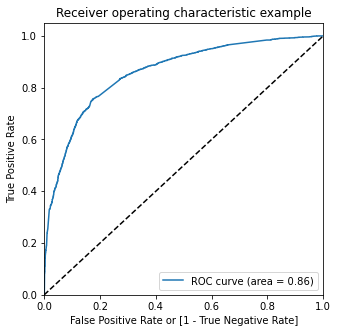

(array([0.        , 0.        , 0.        , ..., 0.99950025, 0.99975012,
        1.        ]),
 array([0.00000000e+00, 4.05515004e-04, 8.11030008e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.9996872 , 0.9996872 , 0.99963965, ..., 0.01775   , 0.01750543,
        0.01453085]))

In [133]:
# checking the area under the curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### What is the optimal cut-off value ?

In [134]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.342676,0,1,1,1,1,0,0,0,0,0,0
1,0,0.227943,0,1,1,1,0,0,0,0,0,0,0
2,0,0.365979,0,1,1,1,1,0,0,0,0,0,0
3,0,0.720324,1,1,1,1,1,1,1,1,1,0,0
4,0,0.299135,0,1,1,1,0,0,0,0,0,0,0


In [135]:
# checking the sensitivity,accuracy,precision and specificity
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.495826  0.984185  0.194903
0.2   0.2  0.699907  0.899838  0.576712
0.3   0.3  0.791280  0.766423  0.806597
0.4   0.4  0.801175  0.704785  0.860570
0.5   0.5  0.797001  0.644363  0.891054
0.6   0.6  0.785096  0.574615  0.914793
0.7   0.7  0.767471  0.484590  0.941779
0.8   0.8  0.741960  0.374290  0.968516
0.9   0.9  0.683364  0.181265  0.992754


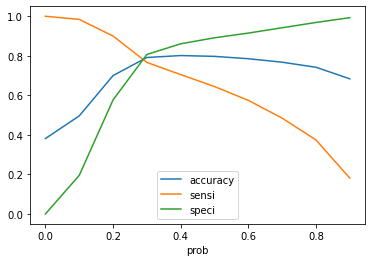

In [136]:
# Plotting it 
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above plot it is seen that the optimal cutoff would be between 0.30 to 0.35

In [137]:
# from the graph taking the optimal cut-off value as 0.33
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.33 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.342676,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.227943,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.365979,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.720324,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.299135,0,1,1,1,0,0,0,0,0,0,0,0


In [138]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7985466914038343

In [139]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3309,  693],
       [ 610, 1856]], dtype=int64)

In [140]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [141]:
# Calculating the sensitivity
TP/(TP+FN)

0.7526358475263585

In [142]:
# Calculating the specificity
TN/(TN+FP)

0.8268365817091454

### Precision and Recall

In [143]:
# confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3566,  436],
       [ 877, 1589]], dtype=int64)

In [144]:
print("Precision")
confusion[1,1]/(confusion[0,1]+confusion[1,1])

Precision


0.7846913580246914

In [145]:
print("Recall")
confusion[1,1]/(confusion[1,0]+confusion[1,1])

Recall


0.6443633414436334

In [146]:
from sklearn.metrics import precision_recall_curve

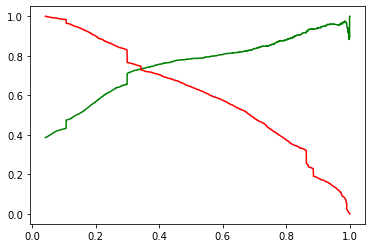

In [147]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Through the curve it is shown that the optimum value is nearly 0.4

### Model Evaluation on the test data

In [148]:
# scaling the numerical variables using Min-Max Scaler of the training data-set.

numerical_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

lead_test[numerical_vars] = scaler.transform(lead_test[numerical_vars])

lead_test.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,Specialization_Travel and Tourism,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,course_Flexibility & Convenience,course_Not Provided,course_Other,Interview_Yes
4269,619003,1,0.031873,0.444982,0.145455,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2376,636884,1,0.000000,0.000000,0.000000,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7766,590281,1,0.019920,0.025968,0.090909,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
9199,579892,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4359,617929,1,0.000000,0.000000,0.000000,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [149]:
# splitting the test data into y and x 
X_test = lead_test.drop(['Converted','Lead Number'],axis = 1)
y_test = lead_test['Converted']

In [150]:
# adding a constant
X_test_sm = sm.add_constant(X_test)

In [151]:
# taking all the columns from the final model 
X_test = X_test_sm[X_train10.columns]

In [152]:
# predicting the y value
y_test_pred = res.predict(X_test)
y_test_pred[:10]

4269    0.202887
2376    0.862874
7766    0.760506
9199    0.299135
4359    0.884872
9186    0.433378
1631    0.577703
8963    0.229990
8007    0.089278
5324    0.227289
dtype: float64

In [153]:
# Data frame with given convertion rate and probablity of predicted ones
y_test_pred = pd.DataFrame({'Converted':y_test.values, 'Conversion_Prob':y_test_pred})
y_test_pred.head()

,Converted,Conversion_Prob
4269,1,0.202887
2376,1,0.862874
7766,1,0.760506
9199,0,0.299135
4359,1,0.884872


In [154]:
# Making prediction using cut off 0.33
y_test_pred['final_predicted'] = y_test_pred.Conversion_Prob.map(lambda x: 1 if x > 0.33 else 0)
y_test_pred

,Converted,Conversion_Prob,final_predicted
4269,1,0.202887,0
2376,1,0.862874,1
7766,1,0.760506,1
9199,0,0.299135,0
4359,1,0.884872,1
...,...,...,...
8649,0,0.077331,0
2152,1,0.862874,1
7101,0,0.299135,0
5331,0,0.482887,1


In [155]:
# generating the lead score and lead number
y_test_pred['Lead Score'] = round(y_test_pred['Conversion_Prob']*100,2)

y_test_pred['Lead Number'] = lead_test['Lead Number']
y_test_pred.reset_index(drop=True, inplace=True)
y_test_pred

,Converted,Conversion_Prob,final_predicted,Lead Score,Lead Number
0,1,0.202887,0,20.29,619003
1,1,0.862874,1,86.29,636884
2,1,0.760506,1,76.05,590281
3,0,0.299135,0,29.91,579892
4,1,0.884872,1,88.49,617929
...,...,...,...,...,...
2767,0,0.077331,0,7.73,583730
2768,1,0.862874,1,86.29,639134
2769,0,0.299135,0,29.91,595041
2770,0,0.482887,1,48.29,608916


In [156]:
# Check the overall accuracy
print("Accuracy")
metrics.accuracy_score(y_test_pred['Converted'], y_test_pred.final_predicted)

Accuracy


0.7965367965367965

In [157]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_test_pred['Converted'], y_test_pred.final_predicted )
confusion2

array([[1378,  299],
       [ 265,  830]], dtype=int64)

In [158]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [159]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7351638618246236

In [160]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7579908675799086

In [161]:
print("Sensitivity")
print(TP / float(TP+FN))

Sensitivity
0.7579908675799086


In [162]:
print("Specificity")
print(TN / float(TN+FP))

Specificity
0.8217054263565892


### Conclusion:

From the final model developed we are able to generate a lead score which shows how likely the lead is getting converted. From the final predictions it is evident that the people with lead score more than 33 are likely to get converted and sales team can concentrate people with lead score more than 33 to convert them to a lead

It was found that the variables that mattered the most in the potential buyers are:
1. The total time spend on the Website.
2. Total number of visits. 
3. When the lead source was: 
a. Google 
b. Olark chat
c. Organic search 
4. When the lead origin is Lead add format. 
5. When their current occupation is as a working professional. 
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.
